<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/%5BInf%5Dstable_diffusion_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup and Imports

In [1]:
!pip install -Uq diffusers
!pip install -Uq transformers
!pip install -Uq bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 7.1 MB/s eta 0:00:00


In [2]:
from transformers import T5EncoderModel, CLIPTextModelWithProjection
from diffusers import StableDiffusion3Pipeline, SD3Transformer2DModel, AutoencoderKL

import torch

In [3]:
from huggingface_hub import notebook_login

In [4]:
notebook_login()

## Run the pipeline

In [5]:
model_id = "ariG23498/sd3-medium-nf4-pkg"

In [6]:
text_encoder = CLIPTextModelWithProjection.from_pretrained(model_id, subfolder="text_encoder")
text_encoder_2 = CLIPTextModelWithProjection.from_pretrained(model_id, subfolder="text_encoder_2")
text_encoder_3 = T5EncoderModel.from_pretrained(model_id, subfolder="text_encoder_3")

text_encoder/config.json:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
`low_cpu_mem_usage` was None, now default to True since model is quantized.


model.safetensors:   0%|          | 0.00/125M [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
`low_cpu_mem_usage` was None, now default to True since model is quantized.


model.safetensors:   0%|          | 0.00/485M [00:00<?, ?B/s]

text_encoder_3/config.json:   0%|          | 0.00/1.30k [00:00<?, ?B/s]

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
`low_cpu_mem_usage` was None, now default to True since model is quantized.


model.safetensors:   0%|          | 0.00/6.33G [00:00<?, ?B/s]

In [7]:
transformer = SD3Transformer2DModel.from_pretrained(model_id, subfolder="transformer")
vae = AutoencoderKL.from_pretrained(model_id, subfolder="vae")

transformer/config.json:   0%|          | 0.00/923 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/165M [00:00<?, ?B/s]

In [9]:
pipe = StableDiffusion3Pipeline.from_pretrained(
    "stabilityai/stable-diffusion-3-medium-diffusers",
    transformer=transformer,
    vae=vae,
    text_encoder=text_encoder,
    text_encoder_2=text_encoder_2,
    text_encoder_3=text_encoder_3,
    torch_dtype=torch.float16,
)

model_index.json:   0%|          | 0.00/706 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/576 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer_3/special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer_3/tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer_3/tokenizer_config.json:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


  0%|          | 0/28 [00:00<?, ?it/s]

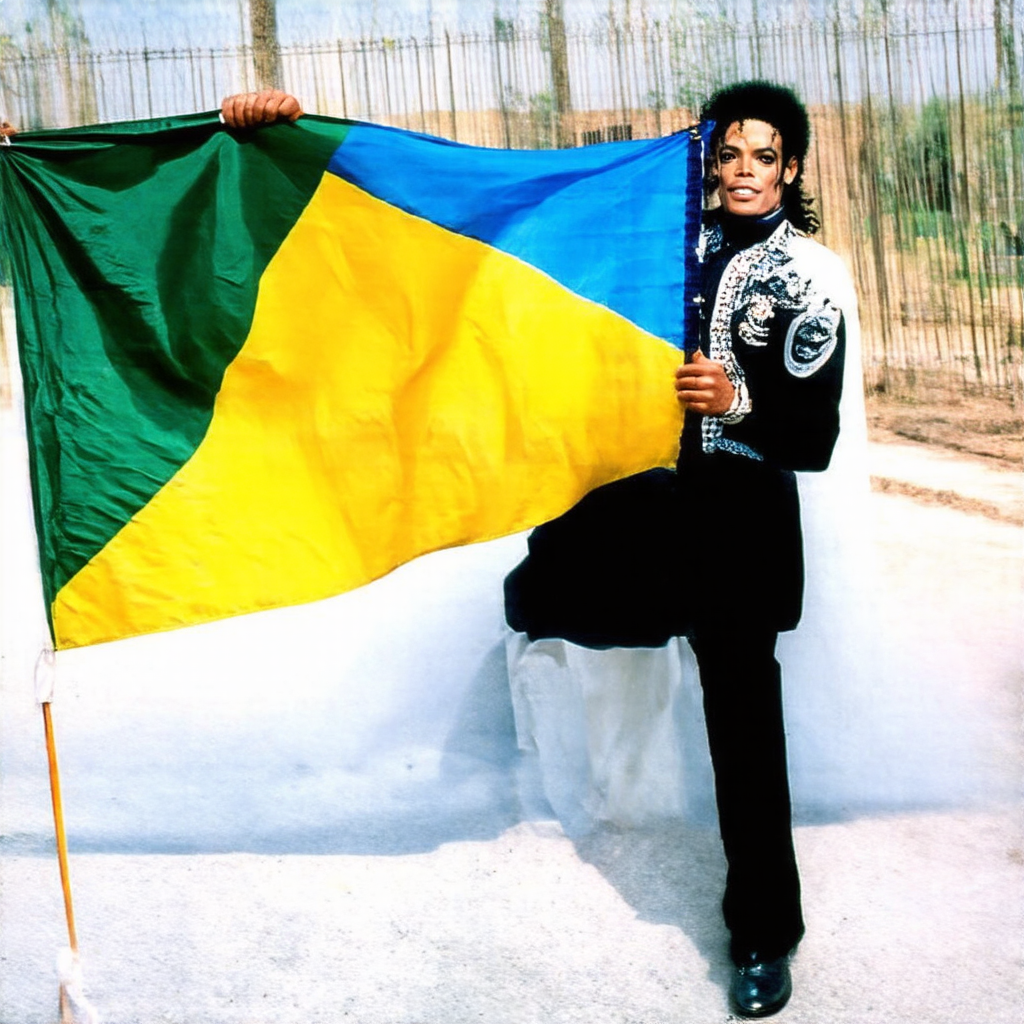

In [11]:
pipe.enable_model_cpu_offload()

image = pipe(
    "michael jackson holding the flag of rwanda",
    negative_prompt="",
    num_inference_steps=28,
    guidance_scale=7.0,
).images[0]
image